In [156]:
#block 1: import all important libraries

%matplotlib inline
from netCDF4 import Dataset
from netCDF4 import num2date
from matplotlib.pyplot import figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io as sio
import pandas as pd
import matplotlib

In [157]:
#block 2: Import the used data file and create a variable with the data in the file

#HFradar data
acorn_URL = "/media/z3525831/Transcend/UNSW/Data HF radar/greatdata.nc"
acorn_DATA = Dataset(acorn_URL) 

#coastline data
coastline = "/media/z3525831/Transcend/UNSW/Data coastline/eaccoast.dat"
coast=np.loadtxt(coastline)

#ADCP data
data = sio.loadmat('/media/z3525831/Transcend/UNSW/DATA ADCP/CH100_nostructure.mat')

In [194]:
#block 3: Creat variable with HF radar dataset 

LAT = acorn_DATA.variables['LATITUDE']
LON = acorn_DATA.variables['LONGITUDE']
TIME = acorn_DATA.variables['TIME']
uData = acorn_DATA.variables['UCUR'][:,:,:]
vData = acorn_DATA.variables['VCUR'][:,:,:]
latData = LAT[:]
lonData = LON[:]

#Creat the Speed variables with the U and V component. Speed dataset for one year.
spData = (uData**2 + vData**2)**0.5
spData2 = spData[:,44,25]
speedHFR = spData2

In [195]:
#block 4: Convert the time serie of HF radar dataset

from netCDF4 import num2date
units = acorn_DATA.variables['TIME'].units
calendar = acorn_DATA.variables['TIME'].calendar
times = num2date(acorn_DATA.variables['TIME'][:], units=units, calendar=calendar)

timeHFR1 = TIME[:]
timeHFRdate =  num2date(timeHFR1, TIME.units, TIME.calendar)
timeHFR = matplotlib.dates.date2num(timeHFRdate)

In [196]:
#block 5: Convert the ADCP time serie dataset (Matlab to python time serie: yyyy/mm/dd hh/mm/ss)

t = data_t[0,:]   
import datetime as dt
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))                       
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366) 
    return day + dayfrac

# convert Matlab variable "t" into list of python datetime objects.
py_t = [matlab2datetime(tval) for tval in t]

timeADCPdate = py_t[100:3020]
timeADCP = matplotlib.dates.date2num(timeADCPdate)

In [197]:
#block 6: Creat variable with ADCP dataset 
#Creation of speed variable for cell closest to the surface.
#Time serie and speed varaible for one year.

U13 = data_U[19,:]
V13 = data_V[19,:]       
Speed = (U13**2 + V13**2)**0.5
tt = t[100:3020,]                       
tt = [matlab2datetime(tval) for tval in tt]
speed2 = Speed[100:3020,]

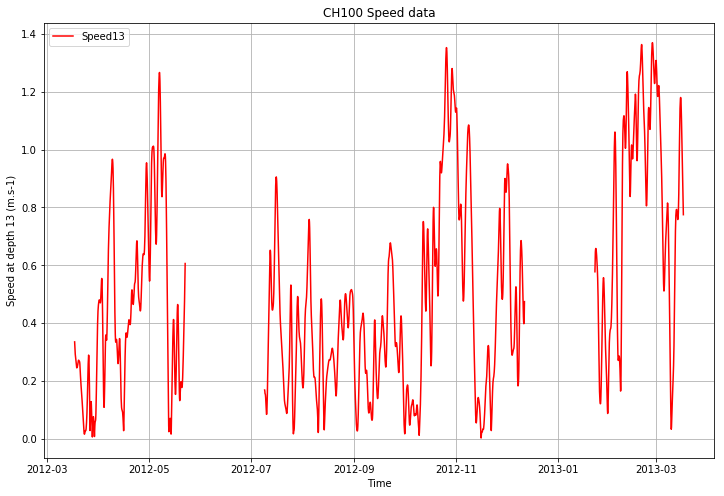

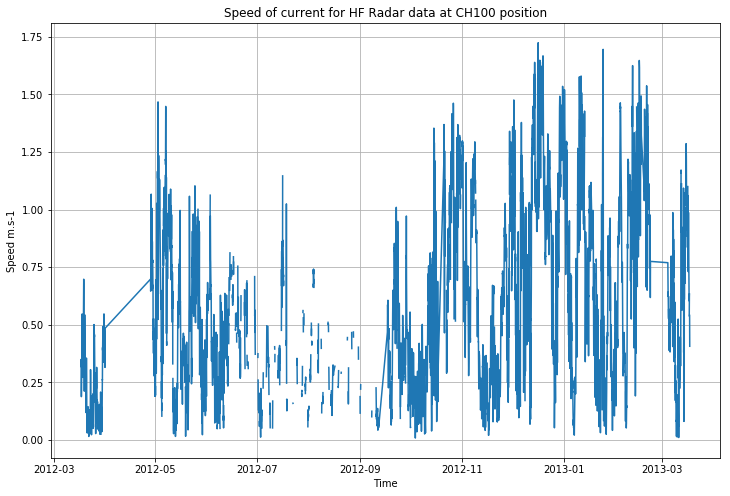

In [198]:
#block 7: Plot the speed acording to the time serie for the ADCP and HFradar data.

#Graph 1 : ADCP speed acording to the time serie for the cell closest to the surface.
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(tt ,speed2,"r", label="Speed13")
plt.xlabel("Time")                                                      
plt.ylabel("Speed at depth 13 (m.s-1)")    
plt.title("CH100 Speed data")
plt.grid(True)                       
plt.legend()                         
plt.show()

#Graph 2 : HF radar speed acording to the time serie.
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(times,spData2)
plt.xlabel("Time")                                                      
plt.ylabel("Speed m.s-1") 
plt.title("Speed of current for HF Radar data at CH100 position")
plt.grid(True)
plt.show()

In [199]:
#Part 2: Correlation between the HFradar and ADCP data. 
#Objectif = use interpolation tools for creat HFradar speed data set with the same shape 
#and frequency like the ADCP dataset.

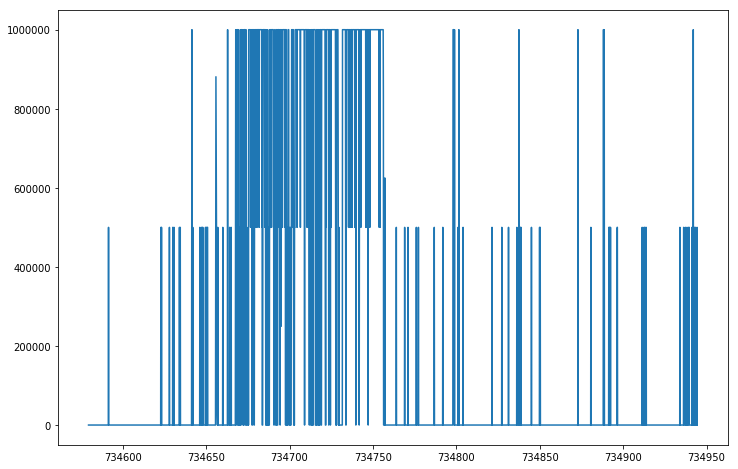

In [200]:
#block 8:  Interpolate the HF speed data with the ADCP time serie for have the frequency.
#interpolation creat wrong data with the nan time value

speedHFR_i = np.interp(timeADCP,timeHFR,speedHFR)
plt.plot(timeADCP,speedHFR_i)

(0, 1.5)

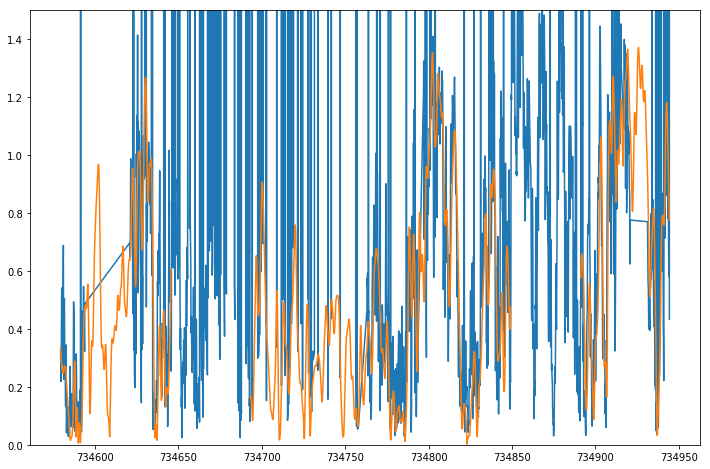

In [191]:
#example 2 of the wrong value

plt.plot(timeADCP,speedHFR_i)
plt.plot(timeADCP,speed2)
plt.ylim(0, 1.5)

In [192]:
#block 9: Clean the new speed HF radar data.

spdHFRclean = np.ma.masked_where(np.isnan(speed2),speedHFR_i )
spdHFRclean2 = np.ma.masked_greater_equal(spdHFRclean,1.4 )

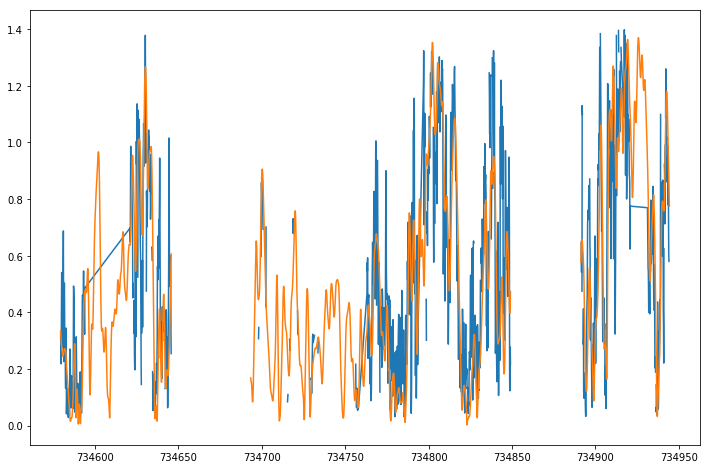

In [193]:
#block 10: Plot the good ADCP and HF radar data with the same shape.

plt.plot(timeADCP,spdHFRclean2)
plt.plot(timeADCP,speed2)

In [178]:
#block 11: correlation
np.ma.corrcoef(spdHFRclean2,speed2)

masked_array(
  data=[[1.0, 0.7758921893156246],
        [0.7758921893156246, 1.0]],
  mask=[[False, False],
        [False, False]],
  fill_value=1e+20)